In [139]:
from geoband.API import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import json
from pandas import json_normalize
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geoband.API import *
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopandas import GeoDataFrame
from folium import Choropleth
import matplotlib
from datetime import datetime 
# GetCompasData로 주피터 노트북 경로에 파일 저장

In [117]:
matplotlib.rcParams['font.family']="Malgun Gothic"

In [46]:
# 원래 데이터
others_park =pd.read_csv('27.4개시도_공원현황.csv')
others_one_person = pd.read_csv('33.4개시도_1인가구수.csv')
others_basic_recipient = pd.read_csv('34.4개시도_기초수급자현황.csv')
others_sex_age_pop = pd.read_csv('35.4개시도_성연령별_총인구분포.csv')
others_foreigner_pop = pd.read_csv('36.4개시도_인구데이터(외국인).csv')
others_suicide = pd.read_csv('37.4개시도_자살율.csv')
others_fire = pd.read_csv('38.4개시도_화재발생통계.csv')
others_police = pd.read_csv('39.4개시도_경찰관서현황.csv')
others_playground = pd.read_csv('40.4개시도_어린이놀이시설현황.csv')
others_land_use_plan = gpd.read_file('41.4개시도_토지이용계획도.geojson')
others_convenience = gpd.read_file('42.4개시도_편의점현황.geojson')

# 전처리_나연.ipynb에서 추가한 데이터
others_basic_recipient_age_range=pd.read_csv('34.4개시도_기초수급자현황_연령대.csv')
others_sex_age_pop_range=pd.read_csv('35.4개시도_성연령별_총인구분포_연령대.csv')
others_sex_age_pop_prod=pd.read_csv('35.4개시도_성연령별_총인구분포_생산연령.csv')
others_sex_age_pop_stat=pd.read_csv('35.4개시도_성연령별_총인구분포_통계값.csv')
others_convenience_company=pd.read_csv("42.4개시도_편의점현황_업체별수.csv")

### 4개 시도
- 진주시 진주시
- 창원시 의창구', '창원시 성산구', '창원시 마산합포구', '창원시 마산회원구'
- '수원시 장안구', '수원시 권선구', '수원시 팔달구', '수원시 영통구'
- 서울시

### 경계파일
1) SIG = gpd.read_file("TL_SCCO_SIG.json") 시군구 경계파일
- 서울 11 / 수원 41 / 창원,진주 48 

2) HJD = gpd.read_file("전국행정동_경계구역.geojson") 행정동 경계파일

In [128]:
SIG = gpd.read_file("전국시군구_경계구역.json")
HJD = gpd.read_file("전국행정동_경계구역.geojson")

In [133]:
w=gpd.read_file("TL_SCCO_CTPRVN.json")
w

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,42,Gangwon-do,강원도,"POLYGON ((128.54881 38.30195, 128.56009 38.257..."
1,41,Gyeonggi-do,경기도,"POLYGON ((127.11055 38.24157, 127.14734 38.241..."
2,48,Gyeongsangnam-do,경상남도,"POLYGON ((128.23751 34.83847, 128.26501 34.818..."
3,47,Gyeongsangbuk-do,경상북도,"POLYGON ((129.57892 36.05176, 129.57496 36.004..."
4,29,Gwangju,광주광역시,"POLYGON ((126.76105 35.25857, 126.76118 35.258..."
5,27,Daegu,대구광역시,"POLYGON ((128.72133 36.00636, 128.72189 36.006..."
6,30,Daejeon,대전광역시,"POLYGON ((127.40151 36.48680, 127.40237 36.486..."
7,26,Busan,부산광역시,"POLYGON ((128.82866 35.08993, 128.85090 35.042..."
8,11,Seoul,서울특별시,"POLYGON ((127.12449 37.46664, 127.12421 37.466..."
9,36,Sejong-si,세종특별자치시,"POLYGON ((127.20794 36.71919, 127.20793 36.719..."


In [134]:
SIG

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((127.60473 38.07265, 127.60776 38.071..."
1,42130,Wonju-si,원주시,"POLYGON ((128.10856 37.29880, 128.10879 37.297..."
2,42150,Gangneung-si,강릉시,"POLYGON ((129.04785 37.64961, 129.07405 37.604..."
3,42170,Donghae-si,동해시,"POLYGON ((129.15959 37.47574, 129.15821 37.476..."
4,42190,Taebaek-si,태백시,"POLYGON ((129.01210 37.31012, 129.01256 37.308..."
...,...,...,...,...
244,43745,Jeungpyeong-gun,증평군,"POLYGON ((127.57828 36.85376, 127.63754 36.846..."
245,43750,Jincheon-gun,진천군,"POLYGON ((127.44709 37.01087, 127.44709 37.010..."
246,43760,Goesan-gun,괴산군,"POLYGON ((127.81627 36.94109, 127.81714 36.941..."
247,43770,Eumseong-gun,음성군,"POLYGON ((127.63193 37.15393, 127.63196 37.153..."


In [4]:
suwon_112 = pd.read_csv('1.수원시_112신고이력(격자_관할경계매핑).csv')
suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson')
others_112 = pd.read_csv('3.3개시도_112신고이력(관할경계매핑).csv')

In [5]:
suwon_112.head()

,case_type,rec_date,rec_time,arrival_date,gid,name,psname
0,비상벨,20200101,183945',NaN,다사56aa19ab,고등파출소,수원서부경찰서
1,기타_타기관,20200101,012615',20200101014135.0,다사58ab18ba,인계파출소,수원남부경찰서
2,폭력,20200101,005151',20200101005314.0,다사56bb21aa,화서문지구대,수원중부경찰서
3,소음,20200101,012608',20200101013131.0,다사57aa17ba,세류지구대,수원남부경찰서
4,분실습득,20200101,014719',NaN,다사59bb21aa,광교지구대,수원남부경찰서


In [6]:
suwon_112_grid.head()

,gid,rep_cnt,geometry
0,다사49aa19ab,0,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ..."
1,다사49aa19ba,0,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ..."
2,다사49aa20aa,0,"MULTIPOLYGON (((126.92472 37.27753, 126.92470 ..."
3,다사49ab18ab,0,"MULTIPOLYGON (((126.92766 37.26177, 126.92764 ..."
4,다사49ab18ba,0,"MULTIPOLYGON (((126.92764 37.26402, 126.92762 ..."


In [77]:
suwon_map = folium.Map(location=[37.30101111,127.0122222], zoom_start=12)

Choropleth(geo_data = suwon_112_grid["geometry"].__geo_interface__, key_on = "feature.id",
           fill_color='YlGnBu').add_to(suwon_map)

suwon_map

In [7]:
others_112.head()

,case_type,rec_date,rec_time,arrival_date,name,psname
0,위험방지,20200101,000141',20200101001115,비봉지구대,진주경찰서
1,소음,20200101,004826',20200101004950,비봉지구대,진주경찰서
2,교통위반,20200101,014339',20200101015133,개양파출소,진주경찰서
3,위험방지,20200101,023507',20200101023915,개양파출소,진주경찰서
4,위험방지,20200101,005003',20200101005019,비봉지구대,진주경찰서


### 위경도
- 27, 39, 40, 41, 42

### sgg_nm
- 33, 34, 35, 36, 37, 38


In [207]:
SIG[SIG['SIG_KOR_NM']=="수원시 팔달구"]

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
20,41115,"Paldal-gu, Suwon-si",수원시 팔달구,"POLYGON ((127.03668 37.25652, 126.97840 37.286..."


## sgg_nm부터

In [8]:
SIG_4 = SIG[(SIG["SIG_CD"].str[:2] == "11") | 
            (SIG["SIG_KOR_NM"].str.split(" ").str[0] == "수원시") | 
            (SIG["SIG_KOR_NM"].str.split(" ").str[0] == "창원시") |
            (SIG["SIG_KOR_NM"].str.split(" ").str[0] == "진주시")]
# 서울 수원 창원 진주의 시군구 경계구역만 가져오기

SIG_4["sgg_nm"] =  SIG_4["SIG_KOR_NM"].apply(lambda x : x.split(" ")[-1])
# '창원시 의창구 -> 의창구'

In [127]:
SIG_4

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,sgg_nm
18,41111,"Jangan-gu, Suwon-si",수원시 장안구,"POLYGON ((127.03168 37.33659, 127.03171 37.336...",장안구
19,41113,"Gwonseon-gu, Suwon-si",수원시 권선구,"POLYGON ((126.94677 37.30056, 126.94691 37.300...",권선구
20,41115,"Paldal-gu, Suwon-si",수원시 팔달구,"POLYGON ((127.03668 37.25652, 126.97840 37.286...",팔달구
21,41117,"Yeongtong-gu, Suwon-si",수원시 영통구,"POLYGON ((127.06030 37.29662, 127.06736 37.295...",영통구
60,48121,"Uichang-gu, Changwon-si",창원시 의창구,"POLYGON ((128.63233 35.22105, 128.62694 35.217...",의창구
61,48123,"Seongsan-gu, Changwon-si",창원시 성산구,"POLYGON ((128.67136 35.24363, 128.67138 35.243...",성산구
62,48125,"Masanhappo-gu, Changwon-si",창원시 마산합포구,"POLYGON ((128.58768 35.22044, 128.56448 35.186...",마산합포구
63,48127,"Masanhoewon-gu, Changwon-si",창원시 마산회원구,"POLYGON ((128.58609 35.27209, 128.58543 35.263...",마산회원구
64,48129,"Jinhae-gu, Changwon-si",창원시 진해구,"POLYGON ((128.69775 35.16881, 128.69782 35.168...",진해구
65,48170,Jinju-si,진주시,"POLYGON ((127.88782 35.21848, 127.88986 35.227...",진주시


In [81]:
SIG_map = folium.Map(location=[37.30101111,127.0122222], zoom_start=7)

Choropleth(geo_data = SIG_4["geometry"].__geo_interface__, key_on = "feature.id",
           fill_color='YlGnBu').add_to(SIG_map)

SIG_map

### Choropleth_sgg : 시군구별 수치 시각화
- 2개의 dataframe 모두 동일한 컬럼(index)을 가지고 있어야 get_Choropleth_sgg 함수 작동

In [82]:
def get_Choropleth_sgg(df,col,index,geo_df):
    df = GeoDataFrame(df.set_index(index))

    # 행정동명을 index로
    
    gdf = GeoDataFrame(geo_df[index],
                   geometry = geo_df["geometry"]).set_index(index)
    
    # Create a base map
    #결과_map = folium.Map(location=[33.253949,126.559658], tiles='cartodbpositron', zoom_start=10)
    결과_map = folium.Map(location=[36.38,127.51],tiles='cartodbpositron' ,zoom_start=7)
    # Add a choropleth map to the base map
    Choropleth(geo_data= gdf["geometry"].__geo_interface__, 
               data=df[col], 
               key_on="feature.id", 
               fill_color='PuRd').add_to(결과_map)
                # PuRd / YlGnBu

    return 결과_map

### 33. 4개시도_1인가구수
- 2017-2019
|칼럼|칼럼명|
|:---|:---|
|sido|시도|
|sgg_nm|시군구|
|sx|성별|
|age|연령|
|date|시점|
|single_person_hh|1인가구|
|house_total_num|주택_계|
|detached_house|주택_단독주택|
|apartment|주택_아파트|
|townhouse|주택_연립주택|
|multiplex_house|주택_다세대주택|
|house_in_commercial|주택_비거주용건물내주택|
|not_in_house|주택이외의거처|

In [11]:
others_one_person

,sido,sgg_nm,sx,age,date,single_person_hh,house_total_num,detached_house,apartment,townhouse,multiplex_house,house_in_commercial,not_in_house
0,서울특별시,종로구,계,합계,2017,23638,19260,11234,2992,887,3279,868,4378
1,서울특별시,종로구,계,20세 미만,2017,507,459,379,11,11,38,20,48
2,서울특별시,종로구,계,20~24,2017,2992,2519,1773,158,44,340,204,473
3,서울특별시,종로구,계,25~29,2017,3627,2845,1677,398,77,552,141,782
4,서울특별시,종로구,계,30~34,2017,2552,1970,1024,357,64,449,76,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,서울특별시,광진구,여자,65~69,2019,1401,1371,837,202,39,257,36,30
5036,서울특별시,광진구,여자,70~74,2019,1300,1268,783,164,35,254,32,32
5037,서울특별시,광진구,여자,75~79,2019,1221,1182,740,175,44,197,26,39
5038,서울특별시,광진구,여자,80~84,2019,849,802,471,170,20,122,19,47


In [12]:
others_one_person_m = others_one_person[others_one_person["sx"] == "남자"]
others_one_person_f = others_one_person[others_one_person["sx"] == "여자"]
others_one_person_all = others_one_person[others_one_person["sx"] == "계"]

In [106]:
종로구=others_one_person[others_one_person['sgg_nm']=="종로구"]
종로구_계=others_one_person_all[others_one_person_all['sgg_nm']=="종로구"]
종로구_계=종로구_계[종로구_계['age']=="합계"].reset_index()
종로구_남=others_one_person_m[others_one_person_m['sgg_nm']=="종로구"]
종로구_남=종로구_남[종로구_남['age']=="합계"].reset_index()
종로구_여=others_one_person_f[others_one_person_f['sgg_nm']=="종로구"]
종로구_여=종로구_여[종로구_여['age']=="합계"].reset_index()
종로구_계

,index,sido,sgg_nm,sx,age,date,single_person_hh,house_total_num,detached_house,apartment,townhouse,multiplex_house,house_in_commercial,not_in_house
0,0,서울특별시,종로구,계,합계,2017,23638,19260,11234,2992,887,3279,868,4378
1,1680,서울특별시,종로구,계,합계,2018,25326,20633,12405,3014,877,3363,974,4693
2,3312,서울특별시,종로구,계,합계,2019,24671,20018,11354,3336,927,3476,925,4653


In [121]:
def 연도별_성별(column):
    index=np.arange(len(종로구_계))
    bar_width=0.4
    plt.bar(index, 종로구_남[column], width=bar_width, label="종로구_남")
    plt.bar(index+bar_width, 종로구_여[column], width=bar_width, label="종로구_여")
    plt.xticks(index+bar_width/2, 종로구_계['date'])
    plt.legend()
    plt.show()

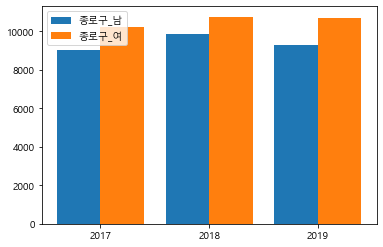

In [123]:
연도별_성별('house_total_num')

In [13]:
others_one_person_all

,sido,sgg_nm,sx,age,date,single_person_hh,house_total_num,detached_house,apartment,townhouse,multiplex_house,house_in_commercial,not_in_house
0,서울특별시,종로구,계,합계,2017,23638,19260,11234,2992,887,3279,868,4378
1,서울특별시,종로구,계,20세 미만,2017,507,459,379,11,11,38,20,48
2,서울특별시,종로구,계,20~24,2017,2992,2519,1773,158,44,340,204,473
3,서울특별시,종로구,계,25~29,2017,3627,2845,1677,398,77,552,141,782
4,서울특별시,종로구,계,30~34,2017,2552,1970,1024,357,64,449,76,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,서울특별시,광진구,계,65~69,2019,2286,2173,1459,253,50,349,62,113
5004,서울특별시,광진구,계,70~74,2019,1959,1884,1239,217,39,338,51,75
5005,서울특별시,광진구,계,75~79,2019,1621,1558,1004,215,56,250,33,63
5006,서울특별시,광진구,계,80~84,2019,1060,995,601,191,24,151,28,65


In [14]:
get_Choropleth_sgg(others_one_person_all,"single_person_hh","sgg_nm",SIG_4)

### 34. 4개시도_기초수급자현황
- 2017.06 - 2021.05
|칼럼|칼럼명|   
|:---|:---|
|date|통계년월|
|sido|통계시도명|
|sgg_nm|통계시군구명|
|age|연령|
|num|수급자수|


In [15]:
others_basic_recipient

,date,sido,sgg_nm,age,num,age_range
0,201706,서울특별시,종로구,4,4,0대
1,201706,서울특별시,종로구,45,26,40대
2,201706,서울특별시,종로구,46,55,40대
3,201706,서울특별시,종로구,47,37,40대
4,201706,서울특별시,종로구,48,51,40대
...,...,...,...,...,...,...
140599,202105,경상남도,진주시,39,94,30대
140600,202105,경상남도,진주시,40,122,40대
140601,202105,경상남도,진주시,41,135,40대
140602,202105,경상남도,진주시,42,114,40대


In [20]:
others_basic_recipient_age_range

,sido,sgg_nm,age_range,num
0,경기도,수원시,0대,50982
1,경기도,수원시,100대,388
2,경기도,수원시,10대,164577
3,경기도,수원시,20대,51829
4,경기도,수원시,30대,42624
...,...,...,...,...
309,서울특별시,중랑구,50대,154235
310,서울특별시,중랑구,60대,160775
311,서울특별시,중랑구,70대,135349
312,서울특별시,중랑구,80대,69882


In [16]:
others_basic_recipient['sgg_nm'].value_counts()
# 창원시와 수원시가 시 단위로 되어있음.. 다 합쳐서 eda 해야할듯!

진주시     5123
노원구     5109
수원시     5103
강서구     5087
강남구     5085
창원시     5071
강북구     5064
도봉구     5063
송파구     5063
동대문구    5057
용산구     5055
관악구     5053
영등포구    5045
마포구     5035
양천구     5035
동작구     5024
은평구     5014
중랑구     5010
종로구     4998
서대문구    4992
강동구     4988
성북구     4982
구로구     4974
금천구     4964
서초구     4949
광진구     4922
성동구     4884
중구      4855
Name: sgg_nm, dtype: int64

In [19]:
get_Choropleth_sgg(others_basic_recipient_age_range[others_basic_recipient_age_range['age_range']=="50대"],"num","sgg_nm",SIG_4)

In [21]:
get_Choropleth_sgg(others_basic_recipient_age_range,"num","sgg_nm",SIG_4)

### 35. 4개시도_성연령별_총인구분포
- 2017 - 2019
|칼럼|칼럼명|   
|:---|:---|
|sido|시도|
|sgg_nm|시군구|
|age|연령 구분|
|date|조사 시점|
|popu_num|총 인구 수|
|popu_male_num|남성 인구 수|
|popu_female_num|여성 인구 수|
|popu_sx_rate|총 인구의 성비|
|local_num|내국인 수|
|local_male_num|남성 내국인 수|
|local_female_num|여성 내국인 수|
|local_sx_rate|내국인 성비|


In [22]:
others_sex_age_pop

,sido,sgg_nm,age,date,popu_num,popu_male_num,popu_female_num,popu_sx_rate,local_num,local_male_num,local_female_num,local_sx_rate
0,서울특별시,종로구,합계,2017,157277.0,76670.0,80607.0,95.1,146298.0,71757.0,74541.0,96.3
1,서울특별시,종로구,0~4세,2017,4137.0,2099.0,2038.0,103.0,4011.0,2039.0,1972.0,103.4
2,서울특별시,종로구,0세,2017,694.0,336.0,358.0,93.9,675.0,327.0,348.0,94.0
3,서울특별시,종로구,1세,2017,836.0,429.0,407.0,105.4,805.0,412.0,393.0,104.8
4,서울특별시,종로구,2세,2017,878.0,459.0,419.0,109.5,850.0,447.0,403.0,110.9
...,...,...,...,...,...,...,...,...,...,...,...,...
13435,서울특별시,중구,15세미만,2017,11035.0,5604.0,5431.0,103.2,10565.0,5334.0,5231.0,102.0
13436,서울특별시,중구,15~64세,2017,97649.0,48332.0,49317.0,98.0,88374.0,44025.0,44349.0,99.3
13437,서울특별시,중구,65세이상,2017,19212.0,8259.0,10953.0,75.4,18692.0,8032.0,10660.0,75.3
13438,서울특별시,중구,평균연령,2017,42.8,42.1,43.5,NaN,43.2,42.4,43.9,NaN


In [23]:
others_sex_age_pop_range

,sido,sgg_nm,age,date,popu_num,popu_male_num,popu_female_num,popu_sx_rate,local_num,local_male_num,local_female_num,local_sx_rate
0,서울특별시,종로구,합계,2017,157277.0,76670.0,80607.0,95.1,146298.0,71757.0,74541.0,96.3
1,서울특별시,종로구,0~4세,2017,4137.0,2099.0,2038.0,103.0,4011.0,2039.0,1972.0,103.4
2,서울특별시,종로구,5~9세,2017,4594.0,2365.0,2229.0,106.1,4511.0,2319.0,2192.0,105.8
3,서울특별시,종로구,10~14세,2017,5002.0,2567.0,2435.0,105.4,4935.0,2532.0,2403.0,105.4
4,서울특별시,종로구,15~19세,2017,10198.0,5267.0,4931.0,106.8,9358.0,4960.0,4398.0,112.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2305,서울특별시,중구,80~84세,2017,2338.0,846.0,1492.0,56.7,2305.0,837.0,1468.0,57.0
2306,서울특별시,중구,85~89세,2017,1098.0,346.0,752.0,46.0,1087.0,343.0,744.0,46.1
2307,서울특별시,중구,90~94세,2017,357.0,103.0,254.0,40.6,351.0,101.0,250.0,40.4
2308,서울특별시,중구,95~99세,2017,77.0,25.0,52.0,48.1,75.0,25.0,50.0,50.0


In [24]:
others_sex_age_pop_prod

,sido,sgg_nm,age,date,popu_num,popu_male_num,popu_female_num,popu_sx_rate,local_num,local_male_num,local_female_num,local_sx_rate
0,서울특별시,종로구,합계,2017,157277.0,76670.0,80607.0,95.1,146298.0,71757.0,74541.0,96.3
1,서울특별시,종로구,15세미만,2017,13733.0,7031.0,6702.0,104.9,13457.0,6890.0,6567.0,104.9
2,서울특별시,종로구,15~64세,2017,119870.0,59371.0,60499.0,98.1,109577.0,54776.0,54801.0,100.0
3,서울특별시,종로구,65세이상,2017,23674.0,10268.0,13406.0,76.6,23264.0,10091.0,13173.0,76.6
4,서울특별시,용산구,합계,2017,223898.0,108471.0,115427.0,94.0,207893.0,99759.0,108134.0,92.3
...,...,...,...,...,...,...,...,...,...,...,...,...
415,경상남도,진해구,65세이상,2019,25405.0,11045.0,14360.0,76.9,25268.0,10982.0,14286.0,76.9
416,서울특별시,중구,합계,2017,127896.0,62195.0,65701.0,94.7,117631.0,57391.0,60240.0,95.3
417,서울특별시,중구,15세미만,2017,11035.0,5604.0,5431.0,103.2,10565.0,5334.0,5231.0,102.0
418,서울특별시,중구,15~64세,2017,97649.0,48332.0,49317.0,98.0,88374.0,44025.0,44349.0,99.3


In [25]:
others_sex_age_pop_stat

,sido,sgg_nm,age,date,popu_num,popu_male_num,popu_female_num,local_num,local_male_num,local_female_num
0,서울특별시,종로구,합계,2017,157277.0,76670.0,80607.0,146298.0,71757.0,74541.0
1,서울특별시,종로구,평균연령,2017,42.1,41.3,42.9,42.6,41.6,43.6
2,서울특별시,종로구,중위연령,2017,42.1,41.1,43.1,43.1,41.9,44.2
3,서울특별시,용산구,합계,2017,223898.0,108471.0,115427.0,207893.0,99759.0,108134.0
4,서울특별시,용산구,평균연령,2017,42.2,41.4,43.0,42.7,41.8,43.5
...,...,...,...,...,...,...,...,...,...,...
310,경상남도,진해구,평균연령,2019,40.6,39.4,41.9,40.7,39.5,42.0
311,경상남도,진해구,중위연령,2019,41.5,40.5,42.7,41.7,40.8,42.8
312,서울특별시,중구,합계,2017,127896.0,62195.0,65701.0,117631.0,57391.0,60240.0
313,서울특별시,중구,평균연령,2017,42.8,42.1,43.5,43.2,42.4,43.9


In [26]:
others_sex_age_pop_all=others_sex_age_pop[others_sex_age_pop['age']=="합계"]
others_sex_age_pop_all

,sido,sgg_nm,age,date,popu_num,popu_male_num,popu_female_num,popu_sx_rate,local_num,local_male_num,local_female_num,local_sx_rate
0,서울특별시,종로구,합계,2017,157277.0,76670.0,80607.0,95.1,146298.0,71757.0,74541.0,96.3
128,서울특별시,용산구,합계,2017,223898.0,108471.0,115427.0,94.0,207893.0,99759.0,108134.0,92.3
256,서울특별시,성동구,합계,2017,302367.0,149060.0,153307.0,97.2,291931.0,144018.0,147913.0,97.4
384,서울특별시,광진구,합계,2017,363934.0,177156.0,186778.0,94.8,345535.0,168833.0,176702.0,95.5
512,서울특별시,동대문구,합계,2017,357380.0,176460.0,180920.0,97.5,339438.0,168977.0,170461.0,99.1
...,...,...,...,...,...,...,...,...,...,...,...,...
12800,경상남도,성산구,합계,2019,219951.0,114488.0,105463.0,108.6,214760.0,110853.0,103907.0,106.7
12928,경상남도,마산합포구,합계,2019,177579.0,88712.0,88867.0,99.8,174434.0,86830.0,87604.0,99.1
13056,경상남도,마산회원구,합계,2019,192446.0,96351.0,96095.0,100.3,189575.0,94740.0,94835.0,99.9
13184,경상남도,진해구,합계,2019,190885.0,98087.0,92798.0,105.7,185968.0,94938.0,91030.0,104.3


In [27]:
get_Choropleth_sgg(others_sex_age_pop_all,"popu_male_num","sgg_nm",SIG_4)

In [28]:
get_Choropleth_sgg(others_sex_age_pop_stat,"popu_male_num","sgg_nm",SIG_4)

### 36. 4개시도_인구데이터(외국인)
- 2017 - 2019
|칼럼|칼럼명|   
|:---|:---|
|sido|시도|
|sgg|시군구|
|foreigner_all(2017)|2017년 기준 총 외국인 인구 수|
|foreigner_M(2017)|2017년 기준 외국인 남성 인구 수|
|foreigner_F(2017)|2017년 기준 외국인 여성 인구 수|
|foreigner_all(2018)|2018년 기준 총 외국인 인구 수|
|foreigner_M(2018)|2018년 기준 외국인 남성 인구 수|
|foreigner_F(2018)|2018년 기준 외국인 여성 인구 수|
|foreigner_all(2019)|2019년 기준 총 외국인 인구 수|
|foreigner_M(2019)|2019년 기준 외국인 남성 인구 수|
|foreigner_F(2019)|2019년 기준 외국인 여성 인구 수|

In [29]:
others_foreigner_pop

,sido,sgg_nm,foreigner_all(2017),foreigner_M(2017),foreigner_F(2017),foreigner_all(2018),foreigner_M(2018),foreigner_F(2018),foreigner_all(2019),foreigner_M(2019),foreigner_F(2019)
0,서울특별시,종로구,10979,4913,6066,12056,5536,6520,13159,5818,7341
1,서울특별시,중구,10265,4804,5461,11988,5735,6253,12559,6025,6534
2,서울특별시,용산구,16005,8712,7293,19126,10879,8247,20503,11621,8882
3,서울특별시,성동구,10436,5042,5394,11307,5403,5904,11774,5610,6164
4,서울특별시,광진구,18399,8323,10076,19729,9032,10697,20925,9474,11451
5,서울특별시,동대문구,17942,7483,10459,19848,8324,11524,21049,8852,12197
6,서울특별시,중랑구,6013,2475,3538,6586,2728,3858,7091,2962,4129
7,서울특별시,성북구,13191,5694,7497,14523,6173,8350,15552,6621,8931
8,서울특별시,강북구,4443,1719,2724,4947,1971,2976,5346,2088,3258
9,서울특별시,도봉구,2629,1059,1570,2951,1199,1752,3320,1380,1940


In [30]:
get_Choropleth_sgg(others_foreigner_pop,"foreigner_all(2017)","sgg_nm",SIG_4)

### 37. 4개시도_자살율
- 2017 - 2019
|칼럼|칼럼명|   
|:---|:---|
|sido|시도별|
|sgg_nm|시군구별|
|sx|성별구분|
|dead_num_2017|사망자수(명)_2017|
|dptt_2017|사망률(십만명당)_2017|
|age_stndrd_dptt_2017|연령표준화사망률(십만명당)_2017|
|dead_num_2018|사망자수(명)_2018|
|dptt_2018|사망률(십만명당)_2018|
|age_stndrd_dptt_2018|연령표준화 사망률(십만명당)_2018|
|dead_num_2019|사망자수(명)_2019|
|dptt_2019|사망률(십만명당)_2019|
|age_stndrd_dptt_2019|연령표준화 사망률(십만명당)_2019|

In [31]:
others_suicide.head()

,sido,sgg_nm,sx,dead_num_2017,dptt_2017,age_stndrd_dptt_2017,dead_num_2018,dptt_2018,age_stndrd_dptt_2018,dead_num_2019,dptt_2019,age_stndrd_dptt_2019
0,서울특별시,종로구,남자,33,45.3,37.2,22,30.3,28.7,30,41.9,32.0
1,서울특별시,종로구,여자,12,15.9,12.4,8,10.6,9.6,9,12.0,11.4
2,서울특별시,중구,남자,20,33.4,26.0,17,28.4,20.0,20,33.4,28.5
3,서울특별시,중구,여자,7,11.5,6.4,7,11.4,9.7,5,8.1,8.8
4,서울특별시,용산구,남자,36,33.7,29.8,33,31.0,26.8,27,25.4,19.6


In [32]:
aggregation = {i:"mean" for i in others_suicide.columns[3:]}

others_suicide_m = others_suicide[others_suicide["sx"] == "남자"]
others_suicide_f = others_suicide[others_suicide["sx"] == "여자"]

others_suicide_all = others_suicide.groupby(["sido","sgg_nm"]).agg(aggregation).reset_index()

In [33]:
others_suicide_all

,sido,sgg_nm,dead_num_2017,dptt_2017,age_stndrd_dptt_2017,dead_num_2018,dptt_2018,age_stndrd_dptt_2018,dead_num_2019,dptt_2019,age_stndrd_dptt_2019
0,서울특별시,강남구,49.5,18.25,17.35,59.0,22.10,19.90,66.5,25.30,23.55
1,서울특별시,강동구,46.5,21.50,18.50,55.0,25.95,22.05,55.5,26.15,22.35
2,서울특별시,강북구,42.0,26.55,21.05,43.0,27.45,22.85,36.0,23.35,17.80
3,서울특별시,강서구,60.0,20.50,17.60,70.0,23.85,21.35,71.0,24.50,19.70
4,서울특별시,관악구,58.0,23.25,20.10,62.0,25.00,20.90,61.0,24.70,21.30
5,서울특별시,광진구,35.5,20.40,18.75,39.0,22.50,19.85,33.5,19.45,15.70
6,서울특별시,구로구,38.5,18.85,16.05,55.5,27.65,23.20,42.0,21.05,17.65
7,서울특별시,금천구,32.0,27.45,22.35,23.5,20.30,14.45,36.5,31.70,26.00
8,서울특별시,노원구,64.5,23.50,20.10,69.0,25.70,21.15,63.5,24.15,19.85
9,서울특별시,도봉구,49.0,28.90,23.35,39.0,23.30,20.95,40.0,24.25,20.15


In [34]:
get_Choropleth_sgg(others_suicide_m,"age_stndrd_dptt_2017","sgg_nm",SIG_4)

### 38. 4개시도_화재발생통계
- 2018 - 2020
|칼럼|칼럼명|   
|:---|:---|
|yr|년도|
|sido|시도|
|sgg_nm|시군구|
|acc_num|화재건수|
|dead_num|사망|
|injr_num|부상|
|tot_vic_num|인명피해 계|
|prop_dmg|부동산피해(천원)|
|chattel_dmg|동산피해(천원)|
|assts_dmg|재산피해(천원)|
|dmg_per_acc|재산피해/건당(천원)|

In [35]:
others_fire

,yr,sido,sgg_nm,acc_num,dead_num,injr_num,tot_vic_num,prop_dmg,chattel_dmg,assts_dmg,dmg_per_acc
0,2018,경기도,권선구,108,0,18,18,1034047,756064,1790111,16575
1,2018,경기도,영통구,89,1,2,3,302241,466660,768901,8639
2,2018,경기도,장안구,92,0,4,4,203169,200131,403300,4384
3,2018,경기도,팔달구,81,0,17,17,941048,1031151,1972199,24348
4,2019,경기도,권선구,124,0,11,11,331803,472602,804405,6487
...,...,...,...,...,...,...,...,...,...,...,...
100,2020,서울특별시,용산구,192,0,5,5,64235,205600,269835,1405
101,2020,서울특별시,은평구,192,2,6,8,270762,234026,504788,2629
102,2020,서울특별시,종로구,217,2,5,7,192633,447118,639751,2948
103,2020,서울특별시,중구,185,0,10,10,573942,710480,1284422,6943


In [36]:
get_Choropleth_sgg(others_fire,"prop_dmg","sgg_nm",SIG_4)

## 위경도 있는 것

### 27. 4개시도_공원현황

|칼럼|칼럼명|   
|:---|:---|
|park_nm|공원명|
|park_gbn|공원 구분 정보|
|lon|경도|
|lat|위도|

In [37]:
others_park

,park_nm,park_gbn,lon,lat
0,악양생태공원,근린공원,128.234986,35.202240
1,희망공원,근린공원,128.115185,35.152369
2,함박웃음공원,근린공원,128.116431,35.156053
3,들빛공원,근린공원,128.118637,35.155451
4,초장1지구4어린이공원,어린이공원,128.114517,35.209689
...,...,...,...,...
2736,안 산,기타,127.069775,37.662302
2737,상계 3,기타,127.077989,37.666114
2738,공릉2(산업대앞),기타,127.073356,37.630521
2739,쌈지마당,기타,127.087945,37.644183


In [38]:
SIG_map1 = folium.Map(location=[37.30101111,127.0122222], zoom_start=7)

Choropleth(geo_data = SIG_4["geometry"].__geo_interface__, key_on = "feature.id",
           fill_color='YlGnBu').add_to(SIG_map1)

for i in range(len(others_park)):
    marker=folium.Marker([others_park.loc[i, 'lat'], others_park.loc[i, 'lon']] , popup=others_park.loc[i, 'park_nm'], icon=folium.Icon(color="blue"))
    marker.add_to(SIG_map1)
    
#SIG_map1

### 39. 4개시도_경찰관서현황
|칼럼|칼럼명|   
|:---|:---|
|pname|관할경찰청 이름|
|psname|관할경찰서 이름|
|name|관할치안센터 이름|
|lon|경도|
|lat|위도|
|addr|주소|

In [39]:
others_police

,pname,psname,name,lon,lat,addr
0,경남청,진주경찰서,개양파출소,128.107802,35.156949,경상남도 진주시 가좌동 448-3
1,경남청,진주경찰서,금산파출소,128.148163,35.213726,경상남도 진주시 금산면 장사리 930-1
2,경남청,진주경찰서,남강지구대,128.072194,35.189701,경상남도 진주시 인사동 182-19
3,경남청,진주경찰서,대곡파출소,128.168509,35.262218,경상남도 진주시 대곡면 광석리 314-1
4,경남청,진주경찰서,문산파출소,128.164086,35.167648,경상남도 진주시 문산읍 삼곡리 1264-12
...,...,...,...,...,...,...
350,서울청,서울노원경찰서,마들지구대,127.063623,37.664577,노원구 상계9동 681
351,서울청,서울노원경찰서,불암지구대,127.080388,37.647649,노원구 중계1동 359-6
352,서울청,서울노원경찰서,서울노원경찰서,127.071408,37.642335,노원구 하계동 250
353,서울청,서울노원경찰서,월계지구대,127.059314,37.633675,노원구 월계동 262-5


In [40]:
SIG_map2 = folium.Map(location=[37.30101111,127.0122222], zoom_start=7)

Choropleth(geo_data = SIG_4["geometry"].__geo_interface__, key_on = "feature.id",
           fill_color='YlGnBu').add_to(SIG_map2)

for i in range(len(others_police)):
    marker=folium.Marker([others_police.loc[i, 'lat'], others_police.loc[i, 'lon']] , popup=others_police.loc[i, 'name'], icon=folium.Icon(color="blue"))
    marker.add_to(SIG_map2)
    
#SIG_map2

### 40. 4개시도_어린이놀이시설현황

|칼럼|칼럼명|   
|:---|:---|
|fac_no|시설번호|
|fac_nm|시설명칭|
|fac_ins_date|설치일자|
|fac_loc|성치위치|
|addr|주소|
|lat|위도|
|lon|경도|

In [141]:
others_playground

,fac_no,fac_nm,fac_ins_date,fac_loc,addr,lat,lon,건설이후(일)
0,500536,진주초등학교 어린이놀이시설,1895-09-24,학교,경상남도 진주시 진주성로24번길 7 (인사동),35.193069,128.078342,46024
1,539182,봉래초등학교 어린이놀이시설,1910-07-01,학교,경상남도 진주시 의병로 265 (봉래동),35.199850,128.087968,40631
2,37623,금곡초등학교 어린이놀이시설,1923-09-10,학교,경상남도 진주시 금곡면 월아산로89번길 11,35.089813,128.184974,35812
3,500509,봉원초등학교 어린이놀이시설,1967-05-31,학교,경상남도 진주시 의병로 95-20 (상봉동),35.201066,128.069919,19843
4,500126,관봉초등학교 어린이놀이시설,1970-07-01,학교,경상남도 진주시 정촌면 정촌로 629,35.137041,128.143664,18716
...,...,...,...,...,...,...,...,...
13088,560787,중계주공9단지 복지동 옆 어린이놀이터,2017-07-18,주택단지,서울특별시 노원구 노원로16길 15 (하계동 중계주공9단지아파트),37.642858,127.073979,1532
13089,561658,불암산(삼육대) 유아숲체험원,2017-10-19,도시공원,서울 노원구 공릉동산 223-1번지 삼육대 제명호 주변,37.642555,127.099103,1439
13090,562586,중계주공9단지 노인복지관 옆 어린이놀이터,2017-12-29,주택단지,서울특별시 노원구 노원로16길 15 (하계동 중계주공9단지아파트),37.642858,127.073979,1368
13091,564803,당고개지구공원 놀이터(물놀이장),2018-08-01,도시공원,서울특별시 노원구 상계동113-2번지 수락산 당고개지구공원,37.669064,127.077097,1153


In [142]:
others_playground.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13093 entries, 0 to 13092
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fac_no        13093 non-null  int64  
 1   fac_nm        13093 non-null  object 
 2   fac_ins_date  13093 non-null  object 
 3   fac_loc       13093 non-null  object 
 4   addr          13093 non-null  object 
 5   lat           13093 non-null  float64
 6   lon           13093 non-null  float64
 7   건설이후(일)       13093 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 818.4+ KB


In [42]:
SIG_map3 = folium.Map(location=[37.30101111,127.0122222], zoom_start=7)

Choropleth(geo_data = SIG_4["geometry"].__geo_interface__, key_on = "feature.id",
           fill_color='YlGnBu').add_to(SIG_map3)

for i in range(len(others_playground)):
    marker=folium.Marker([others_playground.loc[i, 'lat'], others_playground.loc[i, 'lon']] , popup=others_playground.loc[i, 'fac_nm'], icon=folium.Icon(color="blue"))
    marker.add_to(SIG_map3)
    
#SIG_map3

### 41. 4개시도_토지이용계획도
- 특별사항 x
|칼럼|칼럼명|   
|:---|:---|
|ORG_GID|원천공간정보아이디|
|BLOCKTYPE|블록유형|
|BLOCKNAME|블록유형명|
|ZONECODE|사업지구코드|
|ZONENAME|사업지구명|

In [43]:
others_land_use_plan

,ORG_GID,BLOCKTYPE,BLOCKNAME,ZONECODE,ZONENAME,geometry
0,9104.0,완충녹지,완,41111KL1994002,수원천천2,"MULTIPOLYGON (((126.97336 37.30317, 126.97332 ..."
1,9105.0,유치원,유,41111KL1994002,수원천천2,"MULTIPOLYGON (((126.98508 37.29358, 126.98477 ..."
2,9106.0,유치원,유,41111KL1994002,수원천천2,"MULTIPOLYGON (((126.97970 37.29886, 126.97947 ..."
3,9107.0,자전거전용도로,자전거,41111KL1994002,수원천천2,"MULTIPOLYGON (((126.98293 37.29725, 126.98291 ..."
4,9799.0,종교시설용지,종,41111KL1994002,수원천천2,"MULTIPOLYGON (((126.98457 37.29969, 126.98422 ..."
...,...,...,...,...,...,...
9906,107221.0,완충녹지,완,11740DA2010001,강일 도시개발구역,"MULTIPOLYGON (((127.17815 37.55811, 127.17755 ..."
9907,107249.0,완충녹지,완,11740DA2010001,강일 도시개발구역,"MULTIPOLYGON (((127.17794 37.56627, 127.17776 ..."
9908,107250.0,완충녹지,완,11740DA2010001,강일 도시개발구역,"MULTIPOLYGON (((127.17863 37.56934, 127.17856 ..."
9909,107251.0,유치원,유2,11740DA2010001,강일 도시개발구역,"MULTIPOLYGON (((127.17851 37.56324, 127.17848 ..."


In [44]:
landuse_map = folium.Map(location=[37.30101111,127.0122222], zoom_start=7)

Choropleth(geo_data = others_land_use_plan["geometry"].__geo_interface__, key_on = "feature.id",
           fill_color='YlGnBu').add_to(landuse_map)

#landuse_map

### 42. 4개시도_편의점현황
- 특별사항 x
|칼럼|칼럼명|   
|:---|:---|
|store_id|상가업소번호|
|business_nm|상호명|
|store_nm|지점명|
|com_lc_cd|상권업종대분류코드|
|com_lc_nm|상권업종대분류명|
|com_mc_cd|상권업종중분류코드|
|com_mc_nm|상권업종중분류명|
|com_sc_cd|상권업종소분류코드|
|com_sc_nm|상권업종소분류명|
|ksic_cd|표준산업분류코드|
|ksic_nm|표준산업분류명|
|sido_cd|시도코드|
|sido_nm|시도명|
|sgg_cd|시군구코드|
|sgg_nm|시군구명|
|adb_emd_cd|행정동코드|
|adb_emd_nm|행정동명|
|emd_cd|법정동코드|
|emd_nm|법정동명|
|jibun_cd|지번코드|
|land_gbn_cd|대지구분코드|
|land_gbn_nm|대지구분명|
|jibun_bon|지번본번지|
|jibun_bu|지번부번지|
|jibun_addr|지번주소|
|road_cd|도로명코드|
|road_nm|도로명|
|bldg_bon|건물본번지|
|bldg_bu|건물부번지|
|bldg_id|건물관리번호|
|bldg_nm|건물명|
|road_addr|도로명주소|
|old_zip_code|구우편번호|
|zip_code|신우편번호|
|dong|동정보|
|floor|층정보|
|ho|호정보|
|lon|경도|
|lat|위도|

In [45]:
others_convenience
## 얘 마트 종류별로 봐도 될듯~

,STORE_ID,BUSINESS_NM,KSIC_NM,SIDO_NM,sgg_nm,ADB_EMD_NM,EMD_NM,LAND_GBN_NM,JIBUN_ADDR,ROAD_NM,BLDG_ID,ROAD_ADDR,LON,LAT,COMPANY,geometry
0,12033797,GS25인계타운,체인화 편의점,경기도,팔달구,인계동,인계동,대지,경기도 수원시 팔달구 인계동 1031-6,경기도 수원시 팔달구 효원로249번길,4111514100110310006011650,경기도 수원시 팔달구 효원로249번길 47,127.029764,37.264680,GS25,POINT (127.02976 37.26468)
1,12039403,CU 장안연무점,체인화 편의점,경기도,장안구,연무동,연무동,대지,경기도 수원시 장안구 연무동 260-33,경기도 수원시 장안구 창룡대로151번길,4111113700102600033000024,경기도 수원시 장안구 창룡대로151번길 2,127.026622,37.291552,CU,POINT (127.02662 37.29155)
2,11812683,세븐일레븐오목천대로점 오목천대로점,체인화 편의점,경기도,권선구,평동,오목천동,대지,경기도 수원시 권선구 오목천동 558-7,경기도 수원시 권선구 오목천로,4111312900105580007034976,경기도 수원시 권선구 오목천로 54,126.968346,37.239543,세븐일레븐,POINT (126.96835 37.23954)
3,12033749,GS25탑동중앙탑동중앙점 탑동중앙점,체인화 편의점,경기도,권선구,서둔동,탑동,대지,경기도 수원시 권선구 탑동 783-15,경기도 수원시 권선구 탑동로39번길,4111313300107830015025390,경기도 수원시 권선구 탑동로39번길 1,126.974169,37.272285,GS25,POINT (126.97417 37.27229)
4,20320119,미니스톱 영화북문점,체인화 편의점,경기도,장안구,영화동,영화동,대지,경기도 수원시 장안구 영화동 326-6,경기도 수원시 장안구 정조로921번길,4111113400103260006036857,경기도 수원시 장안구 정조로921번길 5,127.012999,37.289745,미니스톱,POINT (127.01300 37.28974)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,25238608,세븐일레븐 롯데몰수원역점,체인화 편의점,경기도,권선구,서둔동,서둔동,대지,경기도 수원시 권선구 서둔동 296-77,경기도 수원시 권선구 세화로,4111313100102960077000001,경기도 수원시 권선구 세화로 134,126.997278,37.264166,세븐일레븐,POINT (126.99728 37.26417)
10998,16025943,이마트 24수원행궁점,체인화 편의점,경기도,팔달구,행궁동,남창동,대지,경기도 수원시 팔달구 남창동 110,경기도 수원시 팔달구 행궁로,4111512300101100000011185,경기도 수원시 팔달구 행궁로 41,127.015374,37.278825,이마트,POINT (127.01537 37.27883)
10999,11809397,세븐일레븐 팔달중동점,체인화 편의점,경기도,팔달구,행궁동,중동,대지,경기도 수원시 팔달구 중동 33,경기도 수원시 팔달구 중부대로,4111512500100330000005176,경기도 수원시 팔달구 중부대로 6,127.017465,37.274995,세븐일레븐,POINT (127.01746 37.27500)
11000,24441852,GS25 광교센타점,체인화 편의점,경기도,영통구,광교2동,하동,대지,경기도 수원시 영통구 하동 972-1,경기도 수원시 영통구 법조로149번길,4111710400109720001000001,경기도 수원시 영통구 법조로149번길 171-3,127.069666,37.292844,GS25,POINT (127.06967 37.29284)


In [51]:
others_convenience_company

,SIDO_NM,sgg_nm,COMPANY,count
0,경기도,권선구,CU,66
1,경기도,권선구,GS25,71
2,경기도,권선구,기타,66
3,경기도,권선구,미니스톱,20
4,경기도,권선구,세븐일레븐,60
...,...,...,...,...
212,서울특별시,중랑구,GS25,102
213,서울특별시,중랑구,기타,39
214,서울특별시,중랑구,미니스톱,8
215,서울특별시,중랑구,세븐일레븐,43


In [48]:
conv_map = folium.Map(location=[37.30101111,127.0122222], zoom_start=7)

Choropleth(geo_data = others_convenience["geometry"].__geo_interface__, key_on = "feature.id",
           fill_color='YlGnBu').add_to(conv_map)

#conv_map

In [52]:
get_Choropleth_sgg(others_convenience_company,"count","sgg_nm",SIG_4)